In [23]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
%matplotlib inline

In [24]:
housing=pd.read_csv("https://ww2.amstat.org/publications/jse/v19n3/decock/AmesHousing.txt", delimiter="\t")

In [25]:
housing.head()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [26]:
def transform_features(df):
    return df

In [27]:
def select_features(df):
    return df[["Gr Liv Area","SalePrice"]]
    

Testing the model with only one feature i.e. Gr Liv Area

In [28]:
def train_and_test(df):
    train=df[0:1460]
    test=df[1460:]
    numerical_cols=df.select_dtypes(include=[np.number]).columns.tolist()
    #Now removing SalesPrice which is our target column
    numerical_cols=numerical_cols[:-1]
    target="SalePrice"
    lr=LinearRegression()
    lr.fit(train[numerical_cols],train[target])
    price=lr.predict(test[numerical_cols])
    mse=mean_squared_error(test[target],price)
    rmse=mse**(1/2)
    return rmse

In [29]:
transform_hosuing = transform_features(housing)
filtered_housing = select_features(transform_hosuing)
rmse = train_and_test(filtered_housing)
rmse

57088.251612639091

## Feature Engineering 

In [30]:
null_values=housing.isnull().sum()
#Removing columns with more than 5% missing values
drop_cols=null_values[null_values > len(housing)/20].index
housing=housing.drop(drop_cols,1)
#Finding text columns
text_cols=housing.select_dtypes(include=['object'])
#Finding null values in all the text columns
text_coll_values=text_cols.isnull().sum()
text_coll_null_values=text_coll_values[text_coll_values>0]
#Removing all the text columns which have null values
housing=housing.drop(text_coll_null_values.index,1)

#Now filling the remaining null values with mean of the columns
housing=housing.fillna(housing.mean())

#The dataframe now has no null values

Dropping unwanted columns and adding few columns for better prediction

In [31]:
housing['years_since_remodel'] = housing['Yr Sold'] - housing['Year Remod/Add']
#as the above column has few negative values we will be removing those values
housing=housing[housing['years_since_remodel']>0]
#dropping the original columns
housing = housing.drop(["Year Built", "Year Remod/Add"], axis = 1)
#dropping unnecessary columns
housing = housing.drop(["PID", "Order", "Mo Sold", "Sale Condition", "Sale Type"], axis=1)



In [32]:
def transform_features(df):
    return df

def select_features(df):
    return df[["Gr Liv Area","SalePrice"]]
    
def train_and_test(df):
    train=df[0:1460]
    test=df[1460:]
    numerical_cols=df.select_dtypes(include=[np.number]).columns.tolist()
    #Now removing SalesPrice which is our target column
    numerical_cols=numerical_cols[:-1]
    target="SalePrice"
    lr=LinearRegression()
    lr.fit(train[numerical_cols],train[target])
    price=lr.predict(test[numerical_cols])
    mse=mean_squared_error(test[target],price)
    rmse=mse**(1/2)
    return rmse

transform_hosuing = transform_features(housing)
filtered_housing = select_features(transform_hosuing)
rmse = train_and_test(filtered_housing)
rmse

47125.954453676983

## Feature Selection

#Selecting only numerical columns for finding correlation of each column with the target column

In [33]:
numerical_cols = housing.select_dtypes(include=[np.number])

In [34]:
correlation_with_target = numerical_cols.corr()['SalePrice'].abs().sort_values()
correlation_with_target

Misc Val               0.011022
Yr Sold                0.014763
3Ssn Porch             0.018963
Bsmt Half Bath         0.024934
Low Qual Fin SF        0.031588
BsmtFin SF 2           0.040383
Overall Cond           0.057481
MS SubClass            0.067870
Pool Area              0.090469
Screen Porch           0.107739
Enclosed Porch         0.113887
Kitchen AbvGr          0.114293
Bsmt Unf SF            0.149696
Bedroom AbvGr          0.174402
Lot Area               0.272263
Bsmt Full Bath         0.277164
Half Bath              0.296264
2nd Flr SF             0.297071
Open Porch SF          0.312254
Wood Deck SF           0.348574
BsmtFin SF 1           0.450253
Mas Vnr Area           0.470673
TotRms AbvGrd          0.476159
Fireplaces             0.488419
years_since_remodel    0.515419
Full Bath              0.541690
Garage Area            0.609103
Garage Cars            0.622516
1st Flr SF             0.623102
Total Bsmt SF          0.632230
Gr Liv Area            0.724094
Overall 

In [35]:
#considering the columns for which correlation is greater than 0.5
correlation_final=correlation_with_target[correlation_with_target>0.5]
correlation_final=correlation_final.drop("SalePrice")
correlation_final.index

Index(['years_since_remodel', 'Full Bath', 'Garage Area', 'Garage Cars',
       '1st Flr SF', 'Total Bsmt SF', 'Gr Liv Area', 'Overall Qual'],
      dtype='object')

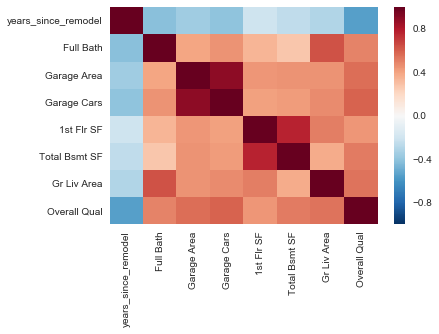

In [36]:
#checking for collinearilty among above mentioned columns
import seaborn as sns
train=housing[0:1460]
cor = train[correlation_final.index].corr()
sns.heatmap(cor)

based on the above plot no column is highly collinear with other column, hence we will proceed with these columns as our features

In [37]:
features=correlation_with_target[correlation_with_target>0.5].index
features

Index(['years_since_remodel', 'Full Bath', 'Garage Area', 'Garage Cars',
       '1st Flr SF', 'Total Bsmt SF', 'Gr Liv Area', 'Overall Qual',
       'SalePrice'],
      dtype='object')

Building a model with all the numeric feature values which are most linearly correlated with the target variable

In [38]:
def transform_features(df):
    return df

def select_features(df):
    return df[features]
    
def train_and_test(df):
    train=df[0:1460]
    test=df[1460:]
    numerical_cols=df.select_dtypes(include=[np.number]).columns.tolist()
    #Now removing SalesPrice which is our target column
    numerical_cols=numerical_cols[:-1]
    target="SalePrice"
    lr=LinearRegression()
    lr.fit(train[numerical_cols],train[target])
    price=lr.predict(test[numerical_cols])
    mse=mean_squared_error(test[target],price)
    rmse=mse**(1/2)
    return rmse
transform_hosuing = transform_features(housing)
filtered_housing = select_features(transform_hosuing)
rmse = train_and_test(filtered_housing)
rmse

31625.515312198324

## Including categorical variables for the prediction

In [39]:
new_df=housing

In [40]:
new_df = new_df.drop(correlation_with_target[correlation_with_target<0.5].index, axis=1)

In [41]:
categorical_columns = ["PID", "MS SubClass", "MS Zoning", "Street", "Alley", "Land Contour", "Lot Config", "Neighborhood", 
                    "Condition 1", "Condition 2", "Bldg Type", "House Style", "Roof Style", "Roof Matl", "Exterior 1st", 
                    "Exterior 2nd", "Mas Vnr Type", "Foundation", "Heating", "Central Air", "Garage Type", 
                    "Misc Feature", "Sale Type", "Sale Condition"]

In [42]:
transform_cat_cols = []
for col in categorical_columns:
    if col in new_df.columns:
        transform_cat_cols.append(col)

# Checking for unique values in each categorical column
uniqueness_counts = new_df[transform_cat_cols].apply(lambda col: len(col.value_counts())).sort_values()

## Setting the cutoff of 10 unique values
drop_nonuniq_cols = uniqueness_counts[uniqueness_counts > 10].index
new_df = new_df.drop(drop_nonuniq_cols, axis=1)

In [43]:
text_cols = new_df.select_dtypes(include=['object'])
for col in text_cols:
    new_df[col] = new_df[col].astype('category')
    
# Creating dummy columns and adding them back to the dataframe
new_df = pd.concat([
    new_df, 
    pd.get_dummies(new_df.select_dtypes(include=['category']))
], axis=1)

In [44]:
def transform_features(df):
    return df

def select_features(df):
    return df
    
def train_and_test(df):
    train=df[0:1460]
    test=df[1460:]
    numeric_df = df.select_dtypes(include=[np.number])
    features = numeric_df.columns.tolist()
    features.remove("SalePrice")    #Now removing SalesPrice which is our target column
    lr=LinearRegression()
    lr.fit(train[features],train["SalePrice"])
    price=lr.predict(test[features])
    mse=mean_squared_error(test["SalePrice"],price)
    rmse=mse**(1/2)
    return rmse
transform_hosuing = transform_features(new_df)
filtered_housing = select_features(transform_hosuing)
rmse = train_and_test(filtered_housing)
rmse

28385.880507653397

We see that as we use categorical attributes to our features,the model prediction improves as we get a low RMSE value.